In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
title = 'ShortSession8'

In [10]:
# Processed raw data: maintenance data excluded, nan value interpolated
mouse_pos = pd.read_parquet('mousepos.parquet', engine='pyarrow')
display(mouse_pos)

,x,y,filtered_position_x,filtered_position_y,filtered_velocity_x,filtered_velocity_y,filtered_acceleration_x,filtered_acceleration_y,smoothed_position_x,smoothed_position_y,smoothed_velocity_x,smoothed_velocity_y,smoothed_acceleration_x,smoothed_acceleration_y,smoothed_speed,smoothed_acceleration
time,,,,,,,,,,,,,,,,
2022-08-15 13:11:30.051296234,237.836426,531.666687,237.829709,531.657690,0.102785,0.587669,0.553673,1.543887,238.050332,531.960782,2.387246,7.745330,114.768281,359.236470,8.104880,377.124117
2022-08-15 13:11:30.071328163,238.111542,532.057739,237.982273,531.891373,1.593067,4.486184,42.815478,112.023049,238.127711,532.210361,5.350734,17.212558,148.174413,473.361412,18.025053,496.010769
2022-08-15 13:11:30.091296196,238.459061,532.976929,238.272732,532.662194,10.243183,31.701830,199.748503,618.333911,238.258487,532.633460,7.726831,25.097328,118.804853,394.238480,26.259851,411.750619
2022-08-15 13:11:30.111328125,238.480743,533.356445,238.491931,533.371544,13.379086,42.335027,185.857466,589.076910,238.425833,533.184975,9.007748,30.054202,64.045820,247.843695,31.375063,255.985086
2022-08-15 13:11:30.131296158,238.517136,533.782959,238.594819,533.916195,10.895791,40.155776,94.134080,359.237494,238.607230,533.811753,9.131985,32.623583,6.211870,128.469050,33.877593,128.619144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-15 16:01:44.127168178,243.603149,520.372925,243.550329,520.184904,-40.161556,95.126141,-169.686206,-682.827866,243.489848,520.506842,-46.811486,106.361583,-371.375069,-528.494617,116.207149,645.930338
2022-08-15 16:01:44.147136211,242.608215,522.574097,242.637712,522.424665,-45.871962,97.701467,-205.253499,-404.786309,242.466036,522.501959,-55.569678,93.150126,-437.909620,-660.572828,108.466286,792.541038
2022-08-15 16:01:44.167168140,241.278580,524.524597,241.391188,524.470203,-58.821244,95.514220,-341.035949,-303.577917,241.258971,524.198283,-65.136865,76.482293,-478.359344,-833.391658,100.460701,960.921077


In [15]:
Visits_Patch1 = pd.read_parquet('../Data/RegressionPatchVisits/' + title + 'Visit1.parquet', engine='pyarrow')
Visits_Patch2 = pd.read_parquet('../Data/RegressionPatchVisits/' + title + 'Visit2.parquet', engine='pyarrow')

In [16]:
Visits_Patch1

,start,end,distance,duration,speed,acceleration,weight,state,entry,PelletsInLastVisitSelf,PelletsInLastVisitOther,IntervalLastVisit
0,2022-08-15 13:11:30.131999969,2022-08-15 13:11:30.197984219,0.039886,0.065984,23.528488,333.897947,17.828171,1,-7.599360,0,0,0.000000
1,2022-08-15 13:12:54.405983925,2022-08-15 13:14:49.433983803,892.700916,115.027999,251.263965,528.298906,17.828171,4,76.574592,0,0,84.207999
2,2022-08-15 13:15:17.761983871,2022-08-15 13:15:32.915999889,103.846100,15.154016,65.114258,474.337222,17.828171,2,219.930592,9,0,28.328000
3,2022-08-15 13:16:08.331999779,2022-08-15 13:16:42.131999969,336.210818,33.800000,257.143861,528.848782,17.828171,4,20.399231,1,0,35.415999
4,2022-08-15 13:17:10.567999840,2022-08-15 13:18:03.033984184,313.439017,52.465984,108.876818,531.429028,17.828171,2,82.635231,3,0,28.435999
...,...,...,...,...,...,...,...,...,...,...,...,...
63,2022-08-15 15:41:17.239999771,2022-08-15 15:41:55.465983868,193.623203,38.225984,14.897361,187.294137,26.799999,1,424.662111,3,1,13.054015
64,2022-08-15 15:44:35.989984035,2022-08-15 15:44:50.303999901,92.777753,14.314015,97.064764,412.124745,23.274513,1,623.412096,2,1,160.524000
65,2022-08-15 15:49:15.349984169,2022-08-15 15:51:16.545983791,892.972447,121.195999,106.758311,564.070417,32.333534,1,42.867296,1,1,265.045984
66,2022-08-15 15:56:21.300000191,2022-08-15 15:57:38.311999798,487.941517,77.011999,152.895519,487.029354,22.210243,1,4.714816,9,1,304.754016


In [17]:
import sys
import os
from pathlib import Path

scripts_dir = Path().resolve()
parent_dir = scripts_dir.parent
sys.path.insert(0, str(parent_dir))

import aeon
import aeon.io.api as api
from aeon.io import reader, video
from aeon.schema.dataset import exp02
from aeon.analysis.utils import visits, distancetravelled


# Long, individual session
root = [Path("/ceph/aeon/aeon/data/raw/AEON2/experiment0.2")]

In [19]:
P = []
for i in range(0,len(Visits_Patch1)):
    start, end = Visits_Patch1.start[i], Visits_Patch1.end[i]
                
    pellets_patch1 = api.load(root, exp02.Patch1.DeliverPellet, start=start, end=end)
    P.append(len(pellets_patch1))

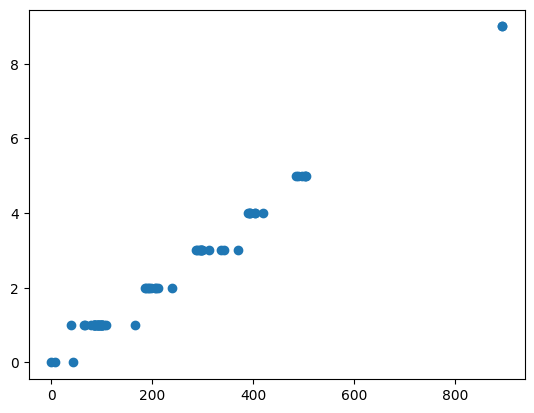

In [20]:
plt.scatter(Visits_Patch1.distance, P)
plt.show()

In [33]:
import numpy as np
from sklearn.linear_model import LinearRegression

model = LinearRegression()

# Fit the model to the data
model.fit(Visits_Patch1.distance.to_numpy().reshape(-1,1), np.array(P).reshape(-1,1))

slope = model.coef_[0]
intercept = model.intercept_


print(slope, intercept)

[0.00984683] [0.04633095]


In [37]:
x = Visits_Patch1.distance.to_numpy()
x = x // 0.04
x

array([    0., 22317.,  2596.,  8405.,  7835.,   960.,  9247.,  6007.,
        1074., 10480.,  2140.,  2444.,  8554.,  1652.,  1982.,  2341.,
        2257.,  2498.,  7306.,  4959., 12409.,  5144.,  1662.,  5198.,
        2299.,  2503.,  2120.,  2370., 12576.,  2155.,  4158.,   199.,
        5296.,  4800.,  7407.,  2477.,  2161., 12624.,  2130.,  2239.,
        2440., 10101.,  9754., 12126.,  2731.,  2359.,  7203.,  2493.,
        9822.,  7430.,  4667.,  2540.,  4702.,  2502.,  7194.,  7350.,
        9778.,  9833., 10076.,  2115.,  2295.,  7444.,  7476.,  4840.,
        2319., 22324., 12198., 12555.])

In [35]:
max(Visits_Patch1.distance.to_numpy())

892.9724474947889